In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
data = pd.read_csv('BostonHousing.csv')

In [210]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


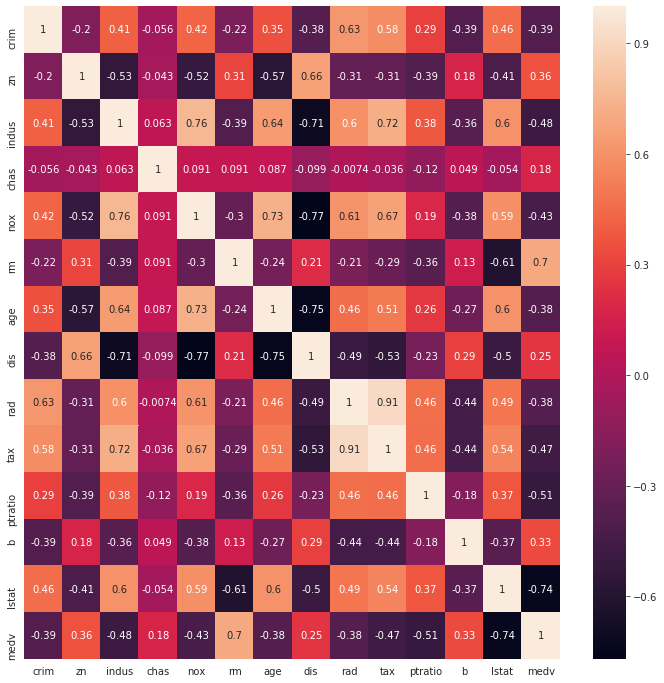

In [211]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(),annot = True)

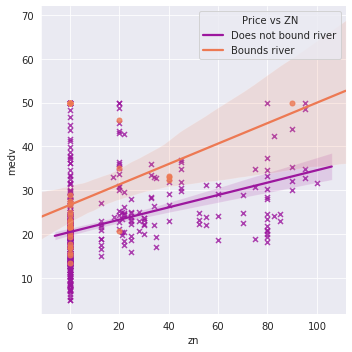

In [212]:
sns.set_style('darkgrid')
sns.lmplot(x = 'zn',y='medv',data = data,hue = 'chas',markers = ['x','o'],scatter_kws = {'s':25},palette = 'plasma',legend = False)
plt.legend(title = 'Price vs ZN' , loc = 'upper right',labels = ['Does not bound river','Bounds river'])

In [213]:
data.isnull().sum().sum()

0

In [214]:
def Normalize(x):
    x = (x - min(x)) / (max(x) - min(x))
    return x

In [215]:
data = data.sample(frac = 1)

In [216]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
383,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666,20.2,396.90,24.56,12.3
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666,20.2,9.32,26.45,8.7
430,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5


In [217]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [218]:
for i in range(X.shape[1]):
    X[:,i] = Normalize(X[:,i])
y = Normalize(y)

In [219]:
train_size = int(0.7*X.shape[0])

In [220]:
X_train,X_test,y_train,y_test = X[:train_size],X[train_size:],y[:train_size],y[train_size:]

In [221]:
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
theta = np.zeros([1,X_train.shape[1]])
y_train = y_train.reshape(X_train.shape[0],1)

In [222]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [223]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    return theta,cost

In [224]:
alpha = 0.03
iters = 1000

g,cost = gradientDescent(X_train,y_train,theta,iters,alpha)
print(g)



[[ 0.21686287 -0.04027392  0.06056302 -0.05330394  0.10347281 -0.01699277
   0.36270686  0.02187145 -0.02770617  0.03228703 -0.05141087 -0.12014954
   0.16615238 -0.26136955]]


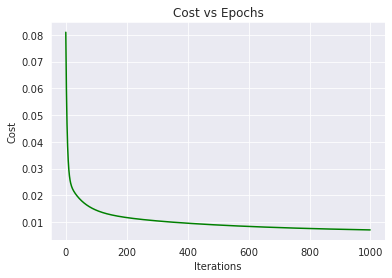

In [225]:
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.plot(list(range(iters)), cost , '-r' , color = 'green')